In [1]:
#Needed Tools
from bs4 import BeautifulSoup

from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora.dictionary import Dictionary

from nltk import word_tokenize, Counter, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
wordnet_lemmatizer = WordNetLemmatizer() 

ENGLISH_STOPS = set(stopwords.words('english'))
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Download the Washington post text of Unabomber's Manifesto
import urllib.request, urllib.error, urllib.parse
url = "http://www.washingtonpost.com/wp-srv/national/longterm/unabomber/manifesto.text.htm"
response = urllib.request.urlopen(url)
webContent = response.read()
clean_text = ' '.join(BeautifulSoup(webContent, "html.parser").stripped_strings)
# print(clean_text)

file_WP = open('manifesto.txt', 'w')
file_WP.write(clean_text)
file_WP.close


<function TextIOWrapper.close()>

In [3]:

def preprocess(text): # Vectorise, cahnge to smaller case,clean,and lemmatize.  
    tokens = word_tokenize(text)
    lower_tokens = [token.lower() for token in tokens] # lower case
    alpha_only = [t for t in lower_tokens if t.isalpha()] #  alpha_only
    no_stops = [t for t in alpha_only if t not in ENGLISH_STOPS]# Remove stop words
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]#lemmatized
    return lemmatized


def tf_idf(text):                #replaces text
    texts = [preprocess(sentence) for sentence in sent_tokenize(text)] #Sentences sepearted 
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    tfidf = TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    tfidf_weights = {dictionary.get(id): value
                     for doc in corpus_tfidf
                     for id, value in doc}
    sorted_tfidf_weights = sorted(tfidf_weights.items(), key=lambda w: w[1])
    return sorted_tfidf_weights

In [4]:
file_WP = open('manifesto.txt', 'r')
content = file_WP.read()
file_WP.close


if __name__ == '__main__':
    #content = retrieve_text("http://www.washingtonpost.com/wp-srv/national/longterm/unabomber/manifesto.text.htm")
    
    tokens = preprocess(content)
    token_counter = Counter(tokens)

    most_common = token_counter.most_common(25)
    
    tf_idf_results = tf_idf(content)
    popular_terms = tf_idf_results[:25]
    rare_terms =  tf_idf_results[-25:]

    # print out words only (without counts and weights)
    keys = lambda x: next(zip(*x))
    print('\n' * 2)
    print(f"Most common words: {keys(most_common)}")
    print('\n' * 2)
    print(f"Most popular terms: {keys(popular_terms)}")
    print('\n' * 2)
    print(f"Most unique/important terms: {keys(rare_terms)}")




Most common words: ('society', 'system', 'people', 'power', 'would', 'one', 'human', 'technology', 'leftist', 'need', 'may', 'social', 'many', 'modern', 'freedom', 'problem', 'goal', 'paragraph', 'make', 'individual', 'way', 'industrial', 'process', 'man', 'behavior')



Most popular terms: ('society', 'people', 'freedom', 'whole', 'human', 'lead', 'system', 'necessity', 'process', 'use', 'population', 'term', 'enough', 'develop', 'fact', 'thought', 'state', 'paragraph', 'increasing', 'today', 'example', 'tendency', 'study', 'person', 'needed')



Most unique/important terms: ('adherent', 'happening', 'inspire', 'drawn', 'flop', 'meantime', 'gaia', 'enterprise', 'stop', 'holy', 'risk', 'fiction', 'slight', 'otherwise', 'lucky', 'license', 'simplification', 'personnel', 'carried', 'crossroad', 'eminent', 'exactly', 'paramount', 'danger', 'virtue')


In [5]:
tf_idf_df= pd.DataFrame(tf_idf(content),columns=['Words', 'TF/IDF'])
print ("High Frequency Words")
print(tf_idf_df.head(10))
print('\n' * 2)
print ("Low Frequency Words")
print(tf_idf_df.tail(10))
print('\n' * 2)

High Frequency Words
       Words    TF/IDF
0    society  0.070668
1     people  0.093045
2    freedom  0.094451
3      whole  0.094847
4      human  0.095126
5       lead  0.098510
6     system  0.099239
7  necessity  0.099739
8    process  0.101075
9        use  0.102728



Low Frequency Words
               Words    TF/IDF
3499         license  0.781434
3500  simplification  0.816939
3501       personnel  0.822237
3502         carried  0.827271
3503       crossroad  0.827443
3504         eminent  0.833276
3505         exactly  0.836579
3506       paramount  0.860334
3507          danger  0.871846
3508          virtue  0.908159





In [6]:

vectorizer = CountVectorizer(stop_words="english")
input=[content]
vectorization_result = vectorizer.fit_transform(input)

vectorization_df = pd.DataFrame(
    list(zip(vectorizer.get_feature_names(), np.ravel(vectorization_result.sum(axis=0)))), columns=["Word", "TF-IDF"]
)

vectorization_df = vectorization_df.sort_values(by=["TF-IDF"], ascending=False)
vectorization_df = vectorization_df[vectorization_df['TF-IDF'] > 0.0]
vectorization_df.head(10)

,Word,TF-IDF
3449,society,244
2742,people,222
2841,power,167
1916,human,140
3674,technology,127
3439,social,98
2045,industrial,97
2453,modern,94
1690,freedom,90
2912,process,73


<AxesSubplot:xlabel='Words', ylabel='Frequency'>

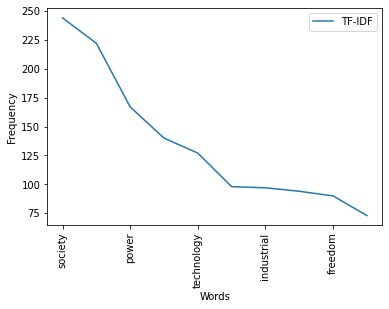

In [7]:
vectorization_df.head(10).plot(x='Word', y='TF-IDF', xlabel= 'Words', ylabel='Frequency',rot=90)